<a href="https://colab.research.google.com/github/monali0802/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)
print(data)

       0      1      2      3      4    ...    96     97     98     99     100
0       74  -7.82   8.79  -9.66  -8.16  ...  99.00  -5.63  99.00  99.00  99.00
1      100   4.08  -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
2       49  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
3       48  99.00   8.35  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
4       91   8.50   4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
24978  100   0.44   7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24979   91   9.13  -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24980   39  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24981   37  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24982   72   2.43   2.67  -3.98   4.27  ...  99.00  99.00  99.00  99.00  99.00

[24983 rows x 101 columns]


In [23]:
arr = data
print(arr.shape)

(24983, 101)


In [24]:
arr.replace(99.00, np.nan, inplace=True)
print(arr)



         0     1     2     3     4     5    ...   95    96    97    98    99    100
0       74.0 -7.82  8.79 -9.66 -8.16 -7.52  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      100.0  4.08 -0.29  6.36  4.37 -2.38  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       49.0   NaN   NaN   NaN   NaN  9.03  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       48.0   NaN  8.35   NaN   NaN  1.80  ...   NaN   NaN   NaN   NaN   NaN   NaN
4       91.0  8.50  4.61 -4.17 -5.39  1.36  ...  5.73  1.55  3.11  6.55  1.80  1.60
...      ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  100.0  0.44  7.43  9.08  2.33  3.20  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979   91.0  9.13 -8.16  8.59  9.08  0.87  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   39.0   NaN   NaN   NaN   NaN -7.77  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   37.0   NaN   NaN   NaN   NaN -9.71  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982   72.0  2.43  2.67 -3.98  4.27 -2.28  ...   NaN   NaN   NaN   NaN   Na

In [25]:
arr_new = arr.drop(columns=[0], axis=1)
print(arr_new)

        1     2     3     4     5     6    ...   95    96    97    98    99    100
0     -7.82  8.79 -9.66 -8.16 -7.52 -8.50  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      4.08 -0.29  6.36  4.37 -2.38 -9.66  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       NaN   NaN   NaN   NaN  9.03  9.27  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       NaN  8.35   NaN   NaN  1.80  8.16  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      8.50  4.61 -4.17 -5.39  1.36  1.60  ...  5.73  1.55  3.11  6.55  1.80  1.60
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  0.44  7.43  9.08  2.33  3.20  6.75  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979  9.13 -8.16  8.59  9.08  0.87 -8.93  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   NaN   NaN   NaN   NaN -7.77   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   NaN   NaN   NaN   NaN -9.71   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982  2.43  2.67 -3.98  4.27 -2.28  7.33  ...   NaN   NaN   NaN   NaN   NaN   NaN

[24

In [26]:
# ranking = new_arr.rank(axis=1, method='average')
# print(ranking)
mean_result = arr_new.mean(axis=0)

print(mean_result)

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64


In [27]:
print(mean_result.min() )
print("Worst rated joke: ",mean_result.idxmin() )
print(mean_result.max() )
print("Best rated joke: ",mean_result.idxmax() )


-3.8338796373689923
Worst rated joke:  58
3.6650848950824937
Best rated joke:  50


In [28]:
rated = np.where(arr_new!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [29]:
def replace_new(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(orig))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])


In [30]:

new_arr, idx = replace_new(arr_new.values, 0.1)

print(new_arr)
print(idx)
arr_new.values[idx[0][0], idx[1][0]]

new_arr[idx[0][0], idx[1][0]]

[[-7.82  8.79 99.   ...   nan   nan   nan]
 [ 4.08 -0.29 99.   ...  0.34 -4.32  1.07]
 [  nan   nan   nan ...   nan   nan   nan]
 ...
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]]
(array([22342, 18521, 11913, ..., 16355,  6157,   740]), array([ 4,  0, 19, ..., 23, 42,  7]))


99.0

In [31]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [ ]:
latent_user_preferences

In [ ]:
latent_item_features

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating != 99.00:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/1:	MSE=26.200838
Iteration 0/1:	MSE=25.243890
Iteration 0/1:	MSE=24.954128
Iteration 0/1:	MSE=24.735104
Iteration 0/1:	MSE=24.523114
Iteration 0/1:	MSE=24.309611
Iteration 0/1:	MSE=24.093749
Iteration 0/1:	MSE=23.876230
Iteration 0/1:	MSE=23.658152
Iteration 0/1:	MSE=23.440680


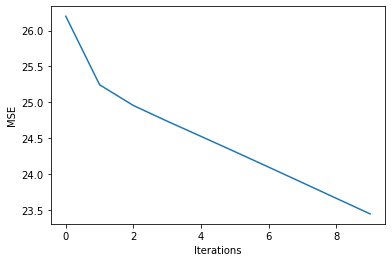

In [ ]:
num_iter = 10
hist = []
for _ in range(num_iter):
  hist.append(sgd(1))  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0 , num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.317063  , 0.88553679, 0.9016225 , ..., 1.38148814, 0.65978437,
        2.02434898],
       [1.66522964, 1.06125585, 1.03090835, ..., 1.91069326, 0.77542871,
        2.55705503],
       [1.89311999, 1.30021429, 1.34709349, ..., 1.9088477 , 0.97590832,
        2.91089873],
       ...,
       [0.83248532, 0.50480718, 0.46728732, ..., 1.02751306, 0.36174084,
        1.27725625],
       [1.55370582, 0.96510818, 0.91502208, ..., 1.8531768 , 0.69825299,
        2.38475914],
       [1.61626247, 1.06341798, 1.06293719, ..., 1.76075321, 0.78622266,
        2.48325352]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
# print(pd.DataFrame(values))
comparison_data = pd.DataFrame(values)
comparison_data.columns = arr_new.columns

In [ ]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.317063004769182)","(8.79, 0.8855367890526419)","(-9.66, 0.9016224985513591)","(-8.16, -0.7615565301089398)","(-7.52, 0.8621301698075726)","(-8.5, 2.2598518196778676)","(-9.85, 0.00417094282927999)","(4.17, -0.33541517774120827)","(-8.98, -0.007854564180092638)","(-4.76, 1.7096475655161458)","(-8.5, 2.3911278768958653)","(-6.75, 2.271743145841887)","(-7.18, -1.4608331430401884)","(8.45, 2.215019041367427)","(-7.18, -1.52186949025797)","(-7.52, -2.773742333723977)","(-7.43, -0.7015497073064451)","(-9.81, -0.3640410592662295)","(-9.85, 0.6242887286172661)","(-9.85, -0.3736547388531317)","(-9.37, 2.766038973391773)","(99.0, 1.55836536312907)","(-4.37, 0.7687475196503236)","(-9.81, -1.0236609912068209)","(-8.5, 1.0423855273085223)","(1.12, 2.0568800602983974)","(7.82, 3.7009260129814456)","(2.86, 2.1012385546975265)","(9.13, 3.4859095085416842)","(-7.43, 0.27058230100770003)","(99.0, 2.745638348015999)","(-4.08, 3.596283797801866)","(-9.08, -0.5937797415471869)","(7.82, 1.63918116051091)","(5.05, 3.4881174812142213)","(99.0, 3.696767695768843)","(-9.17, -0.8323063280934996)","(-8.4, 1.870283486459513)","(-8.4, 1.8028733569003303)","(-8.4, 1.7517366719252425)",...,"(8.59, 3.088166919235165)","(3.59, 3.4641925797461437)","(-6.84, 0.9637602121911628)","(-9.03, -0.0648001026243766)","(2.82, 2.9126148814257586)","(-1.36, 3.1021223285204944)","(99.0, -0.26627726819731157)","(8.3, 3.1741210501016517)","(5.68, 3.1498468873332675)","(-4.81, 1.1384929291735897)","(nan, -0.06109789346033948)","(nan, 3.2156641507745656)","(nan, 1.7649357611741696)","(nan, -0.7625088929120043)","(nan, 0.3741901701677585)","(nan, 2.909958727903366)","(nan, 1.3986984782348932)","(99.0, 2.4110529766596187)","(nan, 0.7767475400518477)","(nan, 1.9371638048257007)","(nan, 2.403556781246821)","(-7.72, 1.4811698700629305)","(nan, 2.5745144872250574)","(nan, 1.3857819740755404)","(nan, 1.618420845433471)","(nan, 0.838140066459803)","(nan, 2.214104689800932)","(nan, 2.4788515829387214)","(nan, 3.761078470450502)","(nan, 1.2479500229718834)","(99.0, 2.3411827156578986)","(nan, 1.7827217921659015)","(nan, 2.9150496868417903)","(nan, 1.644418272368911)","(nan, 1.5561449608923044)","(nan, 1.98966509155379)","(-5.63, 2.1243817365890445)","(nan, 1.3814881399697527)","(nan, 0.6597843686265141)","(nan, 2.024348981271967)"
1,"(99.0, 1.665229636383099)","(-0.29, 1.0612558485094032)","(99.0, 1.0309083512691881)","(4.37, -1.038608424030033)","(-2.38, 1.0793521951240357)","(-9.66, 2.809185414159312)","(-0.73, -0.052281071101729214)","(-5.34, -0.4847103575206687)","(8.88, -0.11119383873897486)","(9.22, 2.082613718159737)","(6.75, 2.9806746365772403)","(8.64, 2.7932184120162113)","(99.0, -1.8643037301140108)","(7.43, 2.7374434235631218)","(4.56, -1.9596620383500059)","(99.0, -3.625161151507137)","(4.66, -0.9317946353682116)","(-0.68, -0.46662708649847806)","(3.3, 0.7829949080532906)","(-1.21, -0.5608470167620271)","(0.87, 3.5376400975745756)","(8.64, 1.8628054640488327)","(8.35, 0.8506548187165108)","(9.17, -1.4990494726231762)","(0.05, 1.3015644261248869)","(7.57, 2.5411925183926067)","(4.71, 4.667413453336212)","(0.87, 2.692385137722333)","(-0.39, 4.406209107265907)","(6.99, 0.2951039427671345)","(6.5, 3.585913964320539)","(-0.92, 4.634312202389878)","(7.14, -0.8996517396417198)","(9.03, 2.0034135420257226)","(-1.8, 4.47583801113712)","(0.73, 4.7236286978017095)","(7.09, -1.096501832350948)","(3.4, 2.296291178431663)","(-0.87, 2.27144768412477)","(7.91, 2.1019842674480165)",...,"(-6.7, 3.9404669281089633)","(-3.35, 4.4344320598611136)","(99.0, 1.1485925242261392)","(4.47, -0.16565394263854266)","(4.08, 3.7316598431173618)","(-3.83, 3.9658876842123334)","(8.74, -0.451128089081378)","(1.12, 4.041977227240917)","(0.78, 4.064030858140476)","(

In [2]:
data_users = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Users')
data_items = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Items')
print(data_users)
print(data_items)

    User   Factor1   Factor2   Factor3  ...  Factor12  Factor13  Factor14  Factor15
0   4768 -0.204024  0.161079 -0.090447  ...  0.355404  0.007108 -0.118663 -0.039125
1    156 -0.189652 -0.178979 -0.091490  ... -0.048606  0.045916  0.113671  0.179873
2   5323 -0.115308 -0.090886 -0.053129  ... -0.019460  0.108372  0.054471 -0.109552
3    174 -0.227462 -0.272532 -0.017231  ... -0.082396  0.036767 -0.165438  0.050692
4   4529 -0.014616 -0.102218 -0.107935  ... -0.132836 -0.039897  0.129063  0.102669
5    783 -0.020301 -0.031919 -0.036955  ...  0.059725 -0.021647  0.039873 -0.061857
6   3878 -0.091462  0.215879 -0.180453  ...  0.214467  0.189250  0.065990  0.102776
7    768  0.000819 -0.009229 -0.019228  ... -0.010051 -0.002108  0.043223 -0.006670
8   4469 -0.030528 -0.011537 -0.042822  ...  0.010926  0.024400  0.005318 -0.007983
9   1882 -0.083093 -0.029160  0.013748  ... -0.113364 -0.021325  0.181508  0.022357
10  4997 -0.185443 -0.276496 -0.781275  ...  0.103116 -0.100563  0.100164  0

In [3]:

users = pd.DataFrame(data_users)
tmp_user = users
print(tmp_user[users['User'] == 3947]['Factor3'])
# []

17   -0.13698
Name: Factor3, dtype: float64


In [9]:
items = pd.DataFrame(data_items)
tmp_item = items
print(tmp_item[items['Factor7'] == max(items['Factor7'])])

    Movie ID                 Title   Factor1  ...  Factor13  Factor14  Factor15
90      8467  Dumb & Dumber (1994)  2.720287  ... -1.240696   0.27991  1.616338

[1 rows x 17 columns]


In [35]:
from sklearn.svm import SVC

np.set_printoptions(precision=3)

In [46]:
print()
user_array = np.array(users)
items_array = np.array(items)

n_latent_factors = 2

user_rating = user_array
item_rating = items_array
latent_user_preferences = np.random.random((user_rating.shape[0], n_latent_factors))
latent_item_features = np.random.random((item_rating.shape[0], n_latent_factors))


user_features = np.concatenate([np.ones(shape=(user_features.shape[0],1)), user_features], axis=1)
item_features = np.concatenate([np.ones(shape=(item_features.shape[0],1)), item_features], axis=1)

user_features_weights = np.random.random((user_rating.shape[0], user_features.shape[1]))
item_features_weights = np.random.random((item_rating.shape[0], item_features.shape[1]))
print(user_features.shape[1])
print(user_features)

user_features_weights = np.random.random((user_rating.shape[0], user_array.shape[1]))
item_features_weights = np.random.random((user_rating.shape[1], items_array.shape[1]))


NameError: ignored